In [3]:
%reset -f

# DATOS .NC
## NetCDF (Network Common Data Form) es un conjunto de bibliotecas de software y formatos de datos independientes de la máquina que admiten la creación, el acceso y el intercambio de datos científicos orientados a matrices. También es un estándar comunitario para compartir datos científicos. El Centro de programas Unidata admite y mantiene interfaces de programación netCDF para C, C++, Java y Fortran. Las interfaces de programación también están disponibles para Python, IDL, MATLAB, R,entre otros.

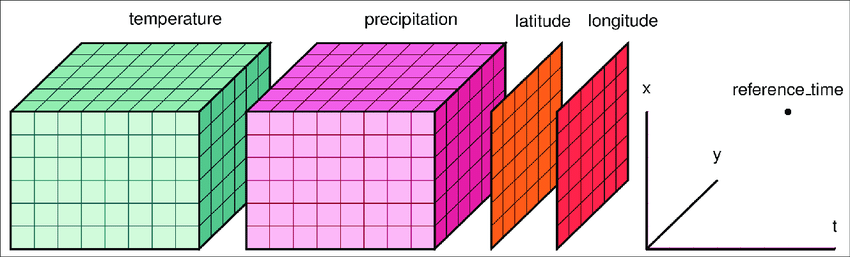
https://www.unidata.ucar.edu/software/netcdf/

In [ ]:
# https://coastwatch.pfeg.noaa.gov/erddap/index.html

In [1]:

import xarray as xr

In [2]:
ds=xr.open_dataset('MUR_GULFODE_CALIFORNIA.nc')

In [5]:
#print(ds)

In [3]:
ds

<xarray.Dataset>
Dimensions:       (time: 1, latitude: 1101, longitude: 1301)
Coordinates:
  * time          (time) datetime64[ns] 2023-06-20T09:00:00
  * latitude      (latitude) float32 22.0 22.01 22.02 22.03 ... 32.98 32.99 33.0
  * longitude     (longitude) float32 -118.0 -118.0 -118.0 ... -105.0 -105.0
Data variables:
    analysed_sst  (time, latitude, longitude) float64 21.01 21.03 ... nan nan
Attributes: (12/50)
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              Grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    creator_name:               JPL MUR SST project
    ...                         ...
    summary:                    This is a merged, multi-sensor L4 Foundation ...
    testOutOfDate:              now-3days
    time_coverage_end:          2023-06-20T09:00:00Z
    time_coverage_start:        2023-06-20T09:00:00Z
    title:                      Multi-scale Ultra-high Resolution (MUR) SST A...
    Westernmost_Easting:        -118.0

In [6]:
ds.keys()

KeysView(<xarray.Dataset>
Dimensions:       (time: 1, latitude: 1101, longitude: 1301)
Coordinates:
  * time          (time) datetime64[ns] 2023-06-20T09:00:00
  * latitude      (latitude) float32 22.0 22.01 22.02 22.03 ... 32.98 32.99 33.0
  * longitude     (longitude) float32 -118.0 -118.0 -118.0 ... -105.0 -105.0
Data variables:
    analysed_sst  (time, latitude, longitude) float64 21.01 21.03 ... nan nan
Attributes: (12/50)
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              Grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    creator_name:               JPL MUR SST project
    ...                         ...
    summary:                    This is a merged, multi-sensor L4 Foundation ...
    testOutOfDate:              now-3days
    time_coverage_end:          2023-06-20T09:00:

In [7]:
ds.analysed_sst

<xarray.DataArray 'analysed_sst' (time: 1, latitude: 1101, longitude: 1301)>
array([[[21.011, 21.034, ...,    nan,    nan],
        [20.989, 21.012, ...,    nan,    nan],
        ...,
        [18.455, 18.459, ...,    nan,    nan],
        [18.449, 18.452, ...,    nan,    nan]]])
Coordinates:
  * time       (time) datetime64[ns] 2023-06-20T09:00:00
  * latitude   (latitude) float32 22.0 22.01 22.02 22.03 ... 32.98 32.99 33.0
  * longitude  (longitude) float32 -118.0 -118.0 -118.0 ... -105.0 -105.0 -105.0
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    comment:          "Final" version using Multi-Resolution Variational Anal...
    ioos_category:    Temperature
    long_name:        Analysed Sea Surface Temperature
    source:           MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G-NAVO,...
    standard_name:    sea_surface_foundation_temperature
    units:            degree_C
    valid_max:        57.767
    valid_min:        -7.767000000000003

In [15]:
sst3d=ds.analysed_sst.values
lat=ds.latitude.values
lon=ds.longitude.values

In [10]:
sst=sst3d[0,:,:]

In [11]:
import numpy as np
min=np.nanmin(sst)
max=np.nanmax(sst)
print(min,max)

16.240000000000002 30.636


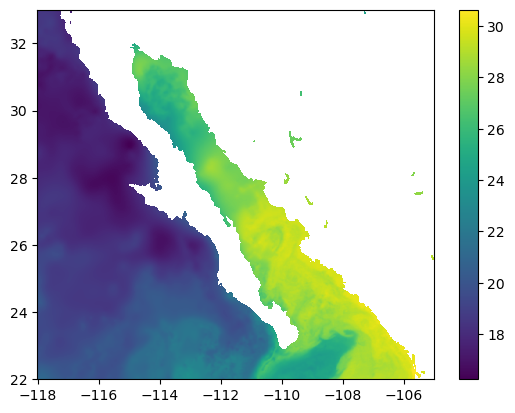

In [19]:
plt.figure(1)
plt.pcolor(lon,lat,sst)
plt.colorbar()

CPU times: total: 15.6 s
Wall time: 15.6 s


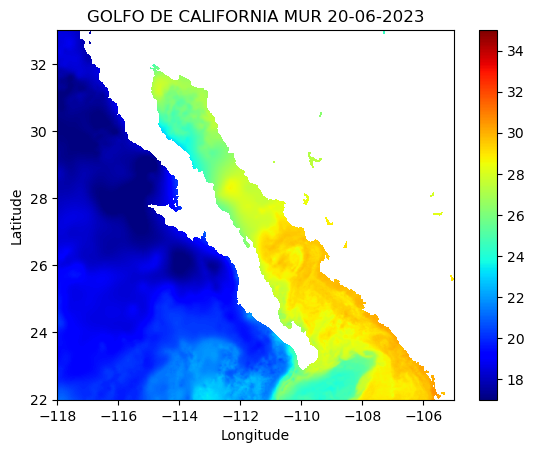

In [23]:
%%time
# figure

import matplotlib.pyplot as plt
plt.figure(2)
plt.pcolor(lon,lat,sst,shading='auto',vmin=17,vmax=35,cmap=plt.cm.jet)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GOLFO DE CALIFORNIA MUR 20-06-2023')
plt.colorbar()
